In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display



In [2]:
data= pd.read_csv("/content/TRADES_CopyTr_90D_ROI.csv")
data.head(1)

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."


In [3]:
print(data.columns)


Index(['Port_IDs', 'Trade_History'], dtype='object')


In [4]:
print(data["Trade_History"].head())


0    [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1    [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2    [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3    [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4    [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
Name: Trade_History, dtype: object


In [5]:
print(data["Trade_History"].dtype)


object


In [6]:
print(data["Trade_History"].iloc[0])  # Check first row


[{'time': 1718899656000, 'symbol': 'SOLUSDT', 'side': 'BUY', 'price': 132.537, 'fee': -0.9940275, 'feeAsset': 'USDT', 'quantity': 1988.055, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'SOL', 'qty': 15.0, 'positionSide': 'LONG', 'activeBuy': True}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.27979617, 'feeAsset': 'USDT', 'quantity': 1398.98088, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 11484.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.03949404, 'feeAsset': 'USDT', 'quantity': 197.47022, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 1621.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899616000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.00828375,

In [7]:
empty_count = data["Trade_History"].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
print(f"Number of empty lists in Trade_History: {empty_count}")


Number of empty lists in Trade_History: 0


In [8]:
import ast

# Convert 'Trade_History' from string to list of dictionaries
def parse_trade_history(trade_history):
    if isinstance(trade_history, str):  # Only parse if it's a string
        try:
            return ast.literal_eval(trade_history)  # Convert string to actual list
        except (SyntaxError, ValueError):
            return None  # If parsing fails, return None
    return trade_history  # Return original if already in correct format

# Apply parsing function
data["Trade_History"] = data["Trade_History"].apply(parse_trade_history)


In [9]:
print(data["Trade_History"].apply(type).value_counts())


Trade_History
<class 'list'>     149
<class 'float'>      1
Name: count, dtype: int64


In [10]:
# Extract unique fields
unique_fields = set()
for trades in data["Trade_History"].dropna():
    if isinstance(trades, list):  # Ensure it's a list
        for trade in trades:
            if isinstance(trade, dict):  # Ensure each trade is a dictionary
                unique_fields.update(trade.keys())

# Display unique fields
print("Unique Fields in Trade_History Column:")
print(unique_fields)


Unique Fields in Trade_History Column:
{'positionSide', 'feeAsset', 'price', 'realizedProfit', 'quantityAsset', 'time', 'quantity', 'side', 'baseAsset', 'symbol', 'fee', 'qty', 'realizedProfitAsset', 'activeBuy'}


In [11]:
# Find the row where Trade_History is missing (NaN)
missing_trade_row = data[data["Trade_History"].isna()]

print("Account with missing Trade_History:")
print(missing_trade_row)


Account with missing Trade_History:
                Port_IDs Trade_History
113  3919965573764932864           NaN


In [12]:
# Count the number of trades per account
trade_counts = data["Trade_History"].apply(lambda x: len(x) if isinstance(x, list) else 0)

print("Number of accounts with zero trades:", (trade_counts == 0).sum())


Number of accounts with zero trades: 1


In [13]:
# Drop the row where Trade_History is NaN
data = data.dropna(subset=["Trade_History"])


print("Updated dataset size:", data.shape)


Updated dataset size: (149, 2)


In [14]:
# Convert Trade_History into separate rows
trade_data = data.explode("Trade_History")

# Reset index for better readability
trade_data = trade_data.reset_index(drop=True)

# Display the first few rows
print(trade_data.head())


              Port_IDs                                      Trade_History
0  3925368433214965504  {'time': 1718899656000, 'symbol': 'SOLUSDT', '...
1  3925368433214965504  {'time': 1718899618000, 'symbol': 'DOGEUSDT', ...
2  3925368433214965504  {'time': 1718899618000, 'symbol': 'DOGEUSDT', ...
3  3925368433214965504  {'time': 1718899616000, 'symbol': 'DOGEUSDT', ...
4  3925368433214965504  {'time': 1718899616000, 'symbol': 'DOGEUSDT', ...


In [15]:
# Convert dictionary format to separate columns
trade_data = pd.concat([trade_data.drop(columns=["Trade_History"]),
                        trade_data["Trade_History"].apply(pd.Series)], axis=1)

# Display transformed data
print(trade_data.head())


              Port_IDs           time    symbol side      price       fee  \
0  3925368433214965504  1718899656000   SOLUSDT  BUY  132.53700 -0.994027   
1  3925368433214965504  1718899618000  DOGEUSDT  BUY    0.12182 -0.279796   
2  3925368433214965504  1718899618000  DOGEUSDT  BUY    0.12182 -0.039494   
3  3925368433214965504  1718899616000  DOGEUSDT  BUY    0.12182 -0.008284   
4  3925368433214965504  1718899616000  DOGEUSDT  BUY    0.12182 -0.046109   

  feeAsset    quantity quantityAsset  realizedProfit realizedProfitAsset  \
0     USDT  1988.05500          USDT             0.0                USDT   
1     USDT  1398.98088          USDT             0.0                USDT   
2     USDT   197.47022          USDT             0.0                USDT   
3     USDT    16.56752          USDT             0.0                USDT   
4     USDT    92.21774          USDT             0.0                USDT   

  baseAsset      qty positionSide  activeBuy  
0       SOL     15.0         LONG

In [16]:
trade_data['realizedProfit'].isnull().value_counts()

,count
realizedProfit,
False,211277


In [17]:
print(trade_data[trade_data["Port_IDs"] == 3925368433214965504]["side"].value_counts())


side
BUY     867
SELL    591
Name: count, dtype: int64


In [18]:
print(trade_data[trade_data["realizedProfit"] != 0])


                   Port_IDs           time     symbol  side      price  \
17      3925368433214965504  1718874124000    ETCUSDT  SELL  24.525000   
18      3925368433214965504  1718874124000    ETCUSDT  SELL  24.525000   
19      3925368433214965504  1718874124000    ETCUSDT  SELL  24.525000   
20      3925368433214965504  1718874124000    ETCUSDT  SELL  24.526000   
21      3925368433214965504  1718874124000    ETCUSDT  SELL  24.526000   
...                     ...            ...        ...   ...        ...   
211265  3768170840939476993  1718961274000  JASMYUSDT   BUY   0.027319   
211266  3768170840939476993  1718961274000  JASMYUSDT   BUY   0.027319   
211267  3768170840939476993  1718961274000  JASMYUSDT   BUY   0.027319   
211268  3768170840939476993  1718961274000  JASMYUSDT   BUY   0.027319   
211269  3768170840939476993  1718961274000  JASMYUSDT   BUY   0.027319   

             fee feeAsset    quantity quantityAsset  realizedProfit  \
17     -0.019252     USDT   38.504250   

In [19]:
# Checking the sell  trades with non-zero realized profit
sell_trades_with_profit = trade_data[(trade_data["side"] == "SELL") & (trade_data["realizedProfit"] != 0)]


print(sell_trades_with_profit[["time", "symbol", "price", "realizedProfit"]].head(10))


             time   symbol   price  realizedProfit
17  1718874124000  ETCUSDT  24.525        1.332563
18  1718874124000  ETCUSDT  24.525        6.925932
19  1718874124000  ETCUSDT  24.525       17.824089
20  1718874124000  ETCUSDT  24.526        6.934092
21  1718874124000  ETCUSDT  24.526       13.859685
22  1718874124000  ETCUSDT  24.526        6.934092
23  1718874124000  ETCUSDT  24.526       23.198615
24  1718874124000  ETCUSDT  24.526        1.045212
25  1718874124000  ETCUSDT  24.526        1.045212
26  1718874124000  ETCUSDT  24.527        6.942252


Understanding the Data

In [20]:
# 1.1 Check dataset size & missing values
print("Dataset Shape:", trade_data.shape)
print("\nMissing Values Per Column:")
print(trade_data.isnull().sum())

Dataset Shape: (211277, 15)

Missing Values Per Column:
Port_IDs               0
time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64


In [21]:
# 1.2 Check data types
print("\nColumn Data Types:")
print(trade_data.dtypes)




Column Data Types:
Port_IDs                 int64
time                     int64
symbol                  object
side                    object
price                  float64
fee                    float64
feeAsset                object
quantity               float64
quantityAsset           object
realizedProfit         float64
realizedProfitAsset     object
baseAsset               object
qty                    float64
positionSide            object
activeBuy                 bool
dtype: object


In [22]:
# 1.3 Unique values in categorical columns
print("\nUnique Symbols:", trade_data["symbol"].nunique())
print("Unique Trade Sides:", trade_data["side"].unique())
print("Unique Position Sides:", trade_data["positionSide"].unique())


Unique Symbols: 154
Unique Trade Sides: ['BUY' 'SELL']
Unique Position Sides: ['LONG' 'SHORT' 'BOTH']


Column-Wise Analysis

In [23]:
# Step 2: Column-wise Analysis

# 2.1 Number of unique accounts (Port_IDs)
unique_accounts = trade_data["Port_IDs"].nunique()

# 2.2 Unique trading pairs (symbol)
unique_symbols = trade_data["symbol"].unique()

# 2.3 Distribution of BUY and SELL trades
trade_side_counts = trade_data["side"].value_counts()

# 2.4 Trade price distribution (min, max, mean)
price_stats = trade_data["price"].describe()

# 2.5 Understanding trade volume (quantity & qty)
quantity_stats = trade_data["quantity"].describe()
qty_stats = trade_data["qty"].describe()

# 2.6 Distribution of realizedProfit
profit_stats = trade_data["realizedProfit"].describe()

# 2.7 PositionSide Distribution (LONG/SHORT/BOTH)
position_side_counts = trade_data["positionSide"].value_counts()

In [24]:
# Display results
print(f"Unique Accounts: {unique_accounts}")
print(f"Unique Symbols: {len(unique_symbols)}")
print("\nTrade Side Counts:")
print(trade_side_counts)


Unique Accounts: 149
Unique Symbols: 154

Trade Side Counts:
side
BUY     107292
SELL    103985
Name: count, dtype: int64


In [25]:
print("\nPrice Stats:")
print(price_stats)


Price Stats:
count    211277.000000
mean       4129.040315
std       15363.534288
min           0.000158
25%           0.143830
50%           2.483300
75%          44.621000
max       72105.000000
Name: price, dtype: float64


In [26]:
print("\nQuantity Stats:")
print(quantity_stats)
print("\nQty Stats:")
print(qty_stats)


Quantity Stats:
count    211277.000000
mean        975.509483
std        4667.098916
min           0.006694
25%          23.340915
50%         127.775000
75%         404.012000
max      602293.260000
Name: quantity, dtype: float64

Qty Stats:
count    2.112770e+05
mean     1.090626e+04
std      1.562781e+05
min      1.000000e-03
25%      2.000000e+00
50%      2.600000e+01
75%      5.790000e+02
max      2.100000e+07
Name: qty, dtype: float64


In [27]:
print("\nProfit Stats:")
print(profit_stats)
print("\nPosition Side Counts:")
print(position_side_counts)


Profit Stats:
count    211277.000000
mean          3.270818
std          57.895095
min       -3269.194444
25%           0.000000
50%           0.000000
75%           0.577590
max        8186.254058
Name: realizedProfit, dtype: float64

Position Side Counts:
positionSide
BOTH     78585
SHORT    71038
LONG     61654
Name: count, dtype: int64


In [28]:
# Convert 'time' column from milliseconds to datetime
trade_data["time"] = pd.to_datetime(trade_data["time"], unit="ms")
trade_data.head()


,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


Data Visualisation

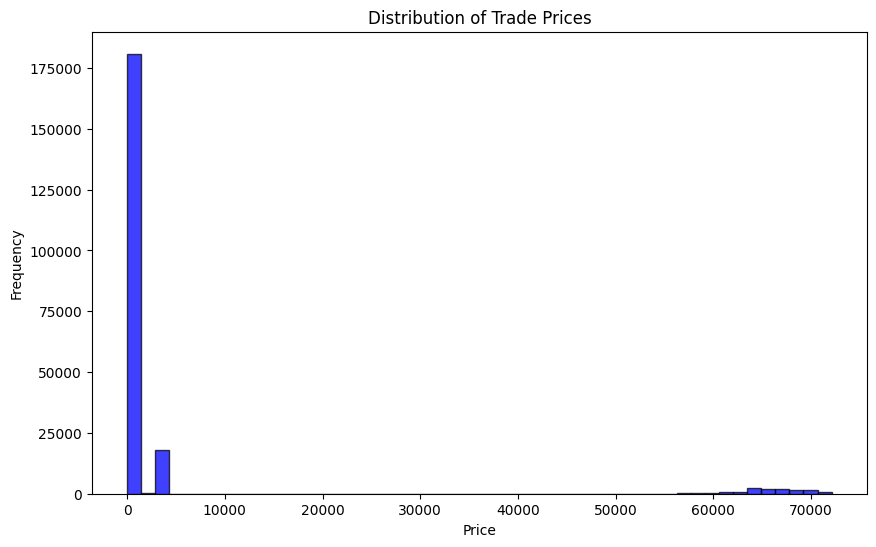

In [29]:
# Price Distribution: Spread of Trade Prices
plt.figure(figsize=(10, 6))
plt.hist(trade_data["price"], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Trade Prices")
plt.show()

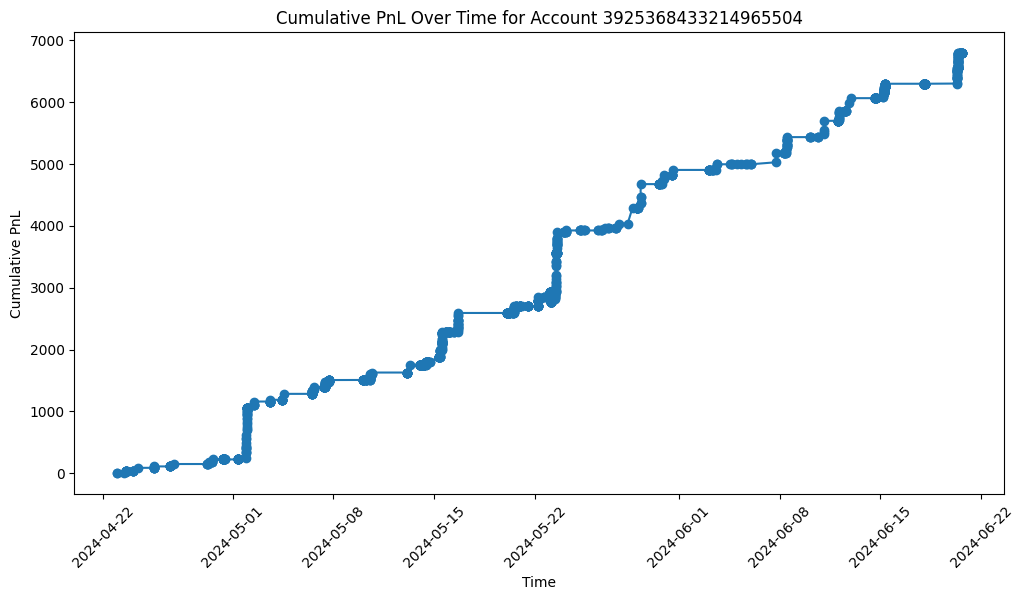

In [30]:
# Cumulative PnL per Account Over Time (Line Chart for One Sample Account)
sample_account = trade_data[trade_data["Port_IDs"] == trade_data["Port_IDs"].iloc[0]].copy()
sample_account = sample_account.sort_values(by="time")
sample_account["cumulative_pnl"] = sample_account["realizedProfit"].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(sample_account["time"], sample_account["cumulative_pnl"], marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL Over Time for Account {sample_account['Port_IDs'].iloc[0]}")
plt.xticks(rotation=45)
plt.show()


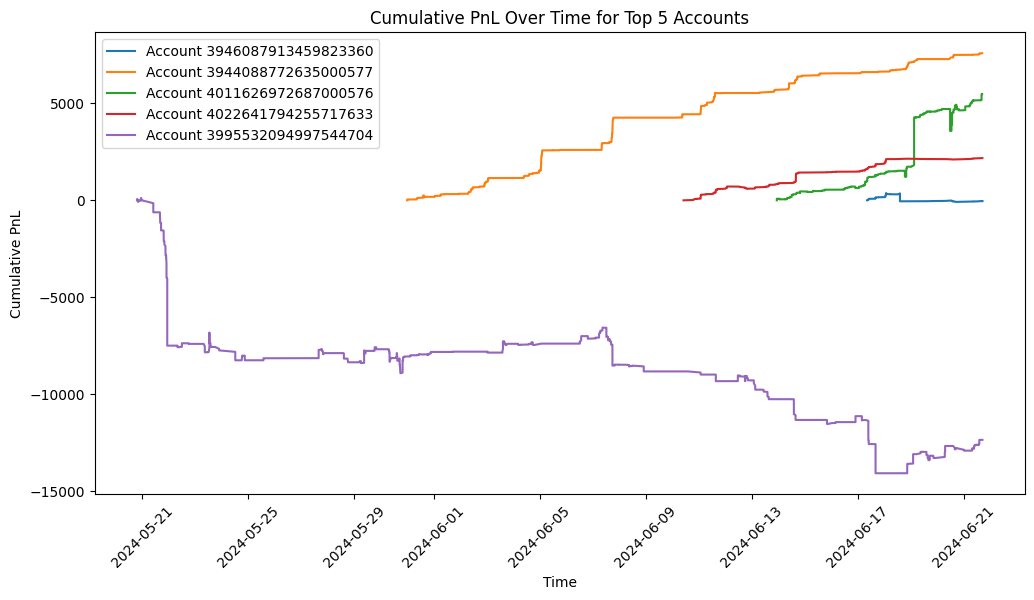

In [31]:
import matplotlib.pyplot as plt

# Select top 5 accounts with highest number of trades
top_accounts = trade_data["Port_IDs"].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for account in top_accounts:
    account_data = trade_data[trade_data["Port_IDs"] == account].copy()
    account_data = account_data.sort_values(by="time")
    account_data["cumulative_pnl"] = account_data["realizedProfit"].cumsum()

    plt.plot(account_data["time"], account_data["cumulative_pnl"], label=f"Account {account}")

plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.title("Cumulative PnL Over Time for Top 5 Accounts")
plt.legend()
plt.xticks(rotation=45)
plt.show()


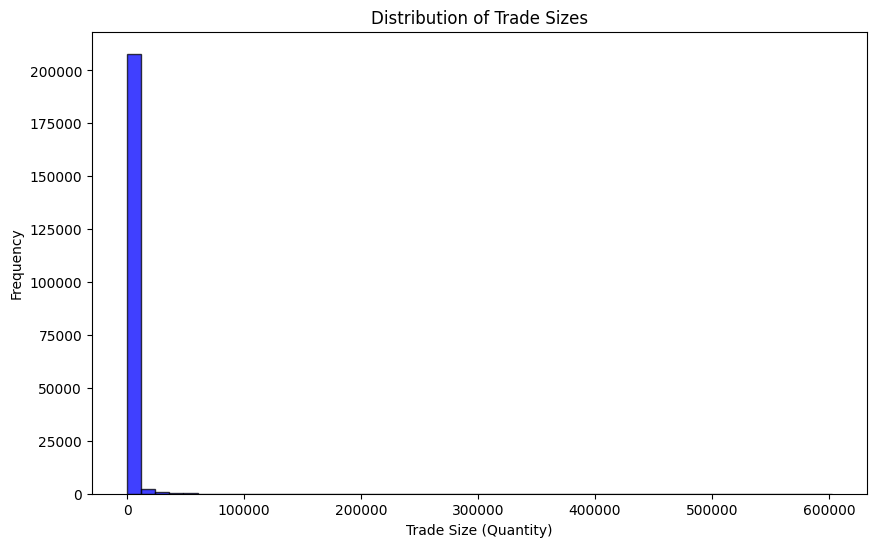

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(trade_data["quantity"], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("Trade Size (Quantity)")
plt.ylabel("Frequency")
plt.title("Distribution of Trade Sizes")
plt.show()


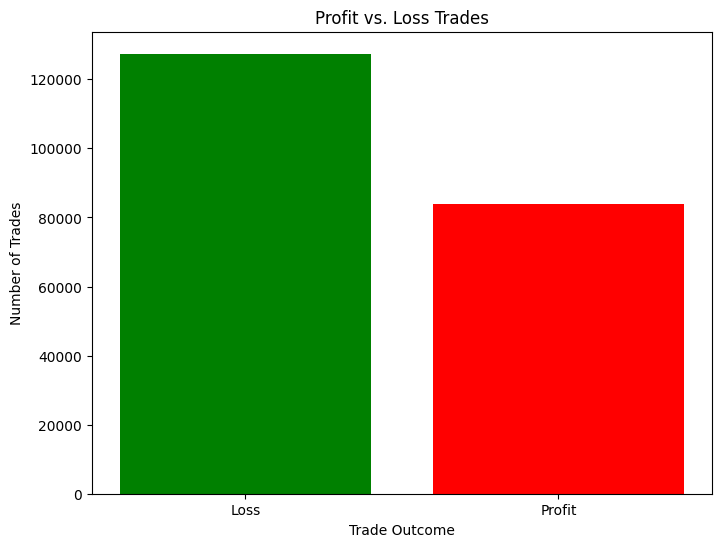

In [33]:
# Count of profitable vs. loss trades
profit_loss_counts = trade_data["realizedProfit"].apply(lambda x: "Profit" if x > 0 else "Loss").value_counts()

plt.figure(figsize=(8, 6))
plt.bar(profit_loss_counts.index, profit_loss_counts.values, color=["green", "red"])
plt.xlabel("Trade Outcome")
plt.ylabel("Number of Trades")
plt.title("Profit vs. Loss Trades")
plt.show()


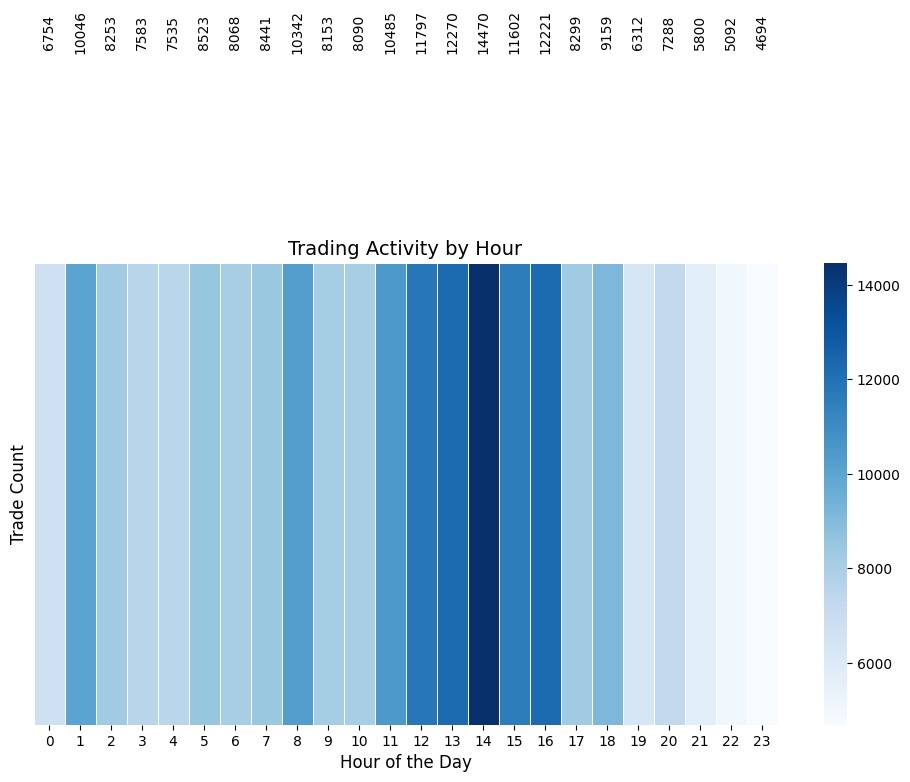

In [34]:
# Extract the hour from the timestamp
trade_data["hour"] = trade_data["time"].dt.hour

# Count the number of trades per hour
hourly_trades = trade_data["hour"].value_counts().sort_index()

# Convert to DataFrame for plotting
hourly_trades_df = pd.DataFrame(hourly_trades).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_trades_df, cmap="Blues", linewidths=0.5, cbar=True, annot=False)


for i, count in enumerate(hourly_trades):
    plt.text(i + 0.5, -0.5, str(count), ha="center", va="center", fontsize=10, rotation=90)  # Vertical text

# Formatting
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Trade Count", fontsize=12)
plt.title("Trading Activity by Hour", fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis readable
plt.yticks([])  # Hide y-axis label for clarity

plt.show()

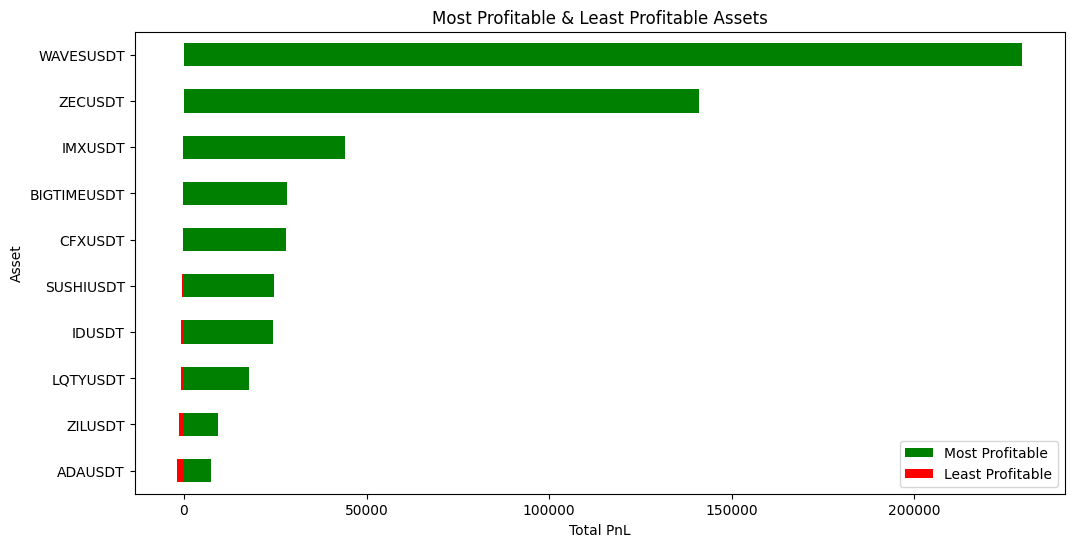

In [35]:
# Aggregate total PnL per asset
pnl_per_asset = trade_data.groupby("symbol")["realizedProfit"].sum().sort_values()

plt.figure(figsize=(12, 6))
pnl_per_asset.tail(10).plot(kind="barh", color="green", label="Most Profitable")
pnl_per_asset.head(10).plot(kind="barh", color="red", label="Least Profitable")
plt.xlabel("Total PnL")
plt.ylabel("Asset")
plt.title("Most Profitable & Least Profitable Assets")
plt.legend()
plt.show()


In [36]:
trade_data = trade_data.sort_values(by=["Port_IDs", "time"])
trade_data['time'].head(10)


,time
117572,2024-04-22 19:33:57
117571,2024-04-22 20:00:15
117569,2024-04-23 00:22:45
117570,2024-04-23 00:22:45
117568,2024-04-23 00:30:12
117567,2024-04-23 01:26:38
117566,2024-04-23 03:03:37
117563,2024-04-23 03:03:40
117564,2024-04-23 03:03:40
117565,2024-04-23 03:03:40


Financial Metric Calculations

In [37]:
# Compute PnL per account
pnl_per_account = trade_data.groupby("Port_IDs")["realizedProfit"].sum().reset_index()
pnl_per_account = pnl_per_account.rename(columns={"realizedProfit": "total_pnl"})

# Display results
from IPython.display import display
print("Total PnL per Account:")
display(pnl_per_account.head(10))


Total PnL per Account:


,Port_IDs,total_pnl
0,3672754654734989568,566.597660
1,3733192481840423936,2923.977200
2,3768170840939476993,243.668899
3,3784403294629753856,2521.814305
4,3786761687746711808,205.021400
5,3788465932399412480,13960.966457
6,3818233536529843712,6419.607907
7,3819545518395756033,980.063200
8,3826087012661391104,532.656974
9,3858510226868015873,-280.972950


In [38]:
# Compute ROI per account
roi_per_account = trade_data.groupby("Port_IDs").agg(
    total_pnl=("realizedProfit", "sum"),  # Total realized profit
    total_quantity=("quantity", "sum")  # Total quantity traded
).reset_index()

# Avoid division by zero
roi_per_account["ROI"] = (roi_per_account["total_pnl"] / roi_per_account["total_quantity"]) * 100
roi_per_account = roi_per_account.drop(columns=["total_quantity"])

# Display results
print("ROI per Account:")
display(roi_per_account.head(10))


ROI per Account:


,Port_IDs,total_pnl,ROI
0,3672754654734989568,566.597660,0.476385
1,3733192481840423936,2923.977200,0.251099
2,3768170840939476993,243.668899,8.779089
3,3784403294629753856,2521.814305,0.339819
4,3786761687746711808,205.021400,0.332072
5,3788465932399412480,13960.966457,0.836806
6,3818233536529843712,6419.607907,0.789209
7,3819545518395756033,980.063200,0.689817
8,3826087012661391104,532.656974,12.178517
9,3858510226868015873,-280.972950,-0.035684


In [39]:
# Compute Win Rate, Total Positions & Win Positions per account
win_rate_per_account = trade_data.groupby("Port_IDs").agg(
    total_positions=("realizedProfit", "count"),  # Total number of trades (Total Positions)
    win_positions=("realizedProfit", lambda x: (x > 0).sum())  # Count of profitable trades (Win Positions)
).reset_index()

# Compute Win Rate
win_rate_per_account["win_rate"] = (win_rate_per_account["win_positions"] / win_rate_per_account["total_positions"]) * 100

# Display results
print("Win Rate, Total Positions & Win Positions per Account:")
display(win_rate_per_account.head(10))


Win Rate, Total Positions & Win Positions per Account:


,Port_IDs,total_positions,win_positions,win_rate
0,3672754654734989568,474,210,44.303797
1,3733192481840423936,689,553,80.261248
2,3768170840939476993,14,6,42.857143
3,3784403294629753856,6050,1829,30.231405
4,3786761687746711808,82,37,45.121951
5,3788465932399412480,3069,1369,44.607364
6,3818233536529843712,1421,482,33.919775
7,3819545518395756033,68,26,38.235294
8,3826087012661391104,108,63,58.333333
9,3858510226868015873,996,243,24.397590


In [40]:
# Compute Maximum Drawdown per account
def calculate_mdd(profit_series):
    peak = profit_series.cummax()
    drawdown = (profit_series - peak) / peak
    return drawdown.min()

mdd_per_account = trade_data.groupby("Port_IDs")["realizedProfit"].apply(calculate_mdd).reset_index()
mdd_per_account = mdd_per_account.rename(columns={"realizedProfit": "max_drawdown"})

# Display results
print("Maximum Drawdown per Account:")
display(mdd_per_account.head(10))


Maximum Drawdown per Account:


,Port_IDs,max_drawdown
0,3672754654734989568,-2.335217
1,3733192481840423936,-5.417372
2,3768170840939476993,-1.000000
3,3784403294629753856,-1.712202
4,3786761687746711808,-2.472832
5,3788465932399412480,-1.252005
6,3818233536529843712,-1.908813
7,3819545518395756033,-1.000000
8,3826087012661391104,-1.342495
9,3858510226868015873,-6.528538


In [41]:
# Compute Sharpe Ratio per account
def calculate_sharpe(profit_series):
    return profit_series.mean() / (profit_series.std() + 1e-9)  # Avoid division by zero

sharpe_per_account = trade_data.groupby("Port_IDs")["realizedProfit"].apply(calculate_sharpe).reset_index()
sharpe_per_account = sharpe_per_account.rename(columns={"realizedProfit": "sharpe_ratio"})

# Display results
print("Sharpe Ratio per Account:")
display(sharpe_per_account.head(10))


Sharpe Ratio per Account:


,Port_IDs,sharpe_ratio
0,3672754654734989568,0.185274
1,3733192481840423936,0.060265
2,3768170840939476993,0.424277
3,3784403294629753856,0.106585
4,3786761687746711808,0.215150
5,3788465932399412480,0.152912
6,3818233536529843712,0.154282
7,3819545518395756033,0.214723
8,3826087012661391104,0.675101
9,3858510226868015873,-0.013558


In [42]:
# Classify Trades Function
def classify_trade(row):
    if row["side"] == "BUY" and row["positionSide"] == "LONG":
        return "long_open"
    elif row["side"] == "SELL" and row["positionSide"] == "LONG":
        return "long_close"
    elif row["side"] == "SELL" and row["positionSide"] == "SHORT":
        return "short_open"
    elif row["side"] == "BUY" and row["positionSide"] == "SHORT":
        return "short_close"
    elif row["positionSide"] == "BOTH":
        return "both_position"  # New classification for BOTH
    else:
        return "unknown"

# Apply Classification to Trade Data
trade_data["trade_type"] = trade_data.apply(classify_trade, axis=1)


# Aggregate Trade Types Per Account
trade_types_per_account = trade_data.groupby("Port_IDs")["trade_type"].value_counts().unstack(fill_value=0).reset_index()




In [43]:
trade_types_per_account.head()

trade_type,Port_IDs,both_position,long_close,long_open,short_close,short_open
0,3672754654734989568,0,131,94,172,77
1,3733192481840423936,0,560,129,0,0
2,3768170840939476993,14,0,0,0,0
3,3784403294629753856,0,762,1295,1472,2521
4,3786761687746711808,0,16,20,25,21


In [44]:
# Check unique values in 'side' and 'positionSide'
print("Unique values in 'side':", trade_data["side"].unique())
print("Unique values in 'positionSide':", trade_data["positionSide"].unique())


Unique values in 'side': ['SELL' 'BUY']
Unique values in 'positionSide': ['SHORT' 'LONG' 'BOTH']


 Merging all computed financial metrics and manually  Assign proper weights





In [45]:
from sklearn.preprocessing import MinMaxScaler

# Merge all computed financial metrics, including trade classification
ranked_accounts = pnl_per_account.merge(roi_per_account, on="Port_IDs", how="inner")\
                                 .merge(win_rate_per_account, on="Port_IDs", how="inner")\
                                 .merge(sharpe_per_account, on="Port_IDs", how="inner")\
                                 .merge(mdd_per_account, on="Port_IDs", how="inner")\
                                 .merge(trade_types_per_account, on="Port_IDs", how="left")  # Merging trade classification

# Fix column naming issue if duplicates exist
if "total_pnl_y" in ranked_accounts.columns:
    ranked_accounts = ranked_accounts.rename(columns={"total_pnl_y": "total_pnl"})
if "total_pnl_x" in ranked_accounts.columns:
    ranked_accounts = ranked_accounts.drop(columns=["total_pnl_x"], errors="ignore")

# Ensure correct columns exist
expected_columns = ["total_pnl", "ROI", "win_rate", "sharpe_ratio", "max_drawdown"]
missing_columns = [col for col in expected_columns if col not in ranked_accounts.columns]
if missing_columns:
    print(f"Missing columns in ranked_accounts: {missing_columns}")
else:
    print("All required columns are present.")

# Check for NaN and Infinite values
print("Checking for NaN or Infinite values before scaling:")
print(ranked_accounts[expected_columns].isna().sum())  # Check missing values
print(np.isinf(ranked_accounts[expected_columns]).sum())  # Check infinite values

# Fix Infinite (`inf`) values in `max_drawdown`
ranked_accounts["max_drawdown"] = ranked_accounts["max_drawdown"].replace([np.inf, -np.inf], 0)

# Normalizing the metrics
scaler = MinMaxScaler()
ranked_accounts[expected_columns] = scaler.fit_transform(ranked_accounts[expected_columns])

# Assigning  proper weights that sum to 1
weights = {
    "total_pnl": 0.444,
    "ROI": 0.222,
    "win_rate": 0.167,
    "sharpe_ratio": 0.167,
    "max_drawdown": -0.111  # Negative weight as lower MDD is better
}

# Computing  final ranking score
ranked_accounts["final_score"] = (
    ranked_accounts["total_pnl"] * weights["total_pnl"] +
    ranked_accounts["ROI"] * weights["ROI"] +
    ranked_accounts["win_rate"] * weights["win_rate"] +
    ranked_accounts["sharpe_ratio"] * weights["sharpe_ratio"] +
    ranked_accounts["max_drawdown"] * weights["max_drawdown"]
)

# Sorting the  accounts by score and select the Top 20
top_20_accounts = ranked_accounts.sort_values(by="final_score", ascending=False).head(20)

# Save results to CSV
ranked_accounts.to_csv("ranked_accounts.csv", index=False)
top_20_accounts.to_csv("top_20_accounts.csv", index=False)

#  Display results
from IPython.display import display
print("\n **Top 20 Accounts Based on Ranking Algorithm:**")
display(top_20_accounts)


All required columns are present.
Checking for NaN or Infinite values before scaling:
total_pnl       0
ROI             0
win_rate        0
sharpe_ratio    0
max_drawdown    1
dtype: int64
total_pnl        0
ROI              0
win_rate         0
sharpe_ratio     0
max_drawdown    11
dtype: int64

 **Top 20 Accounts Based on Ranking Algorithm:**


,Port_IDs,total_pnl,ROI,total_positions,win_positions,win_rate,sharpe_ratio,max_drawdown,both_position,long_close,long_open,short_close,short_open,final_score
8,3826087012661391104,0.152697,1.000000,108,63,0.726793,1.000000,0.985336,0,0,16,69,23,0.468800
96,4020204877254599680,1.000000,0.040306,6050,1993,0.410437,0.184159,0.981305,0,1858,1936,1108,1148,0.443320
75,3999240873283311617,0.651145,0.059077,4522,2366,0.651896,0.405607,0.987825,4522,0,0,0,0,0.369178
2,3768170840939476993,0.149271,0.725084,14,6,0.533971,0.666914,0.989077,14,0,0,0,0,0.318005
62,3986814617275053313,0.340079,0.085599,3554,2780,0.974589,0.541433,0.988724,3554,0,0,0,0,0.313425
17,3907081197088384000,0.359980,0.104007,4137,2540,0.764966,0.399265,0.955296,4137,0,0,0,0,0.271309
47,3956048468100538880,0.162667,0.105246,28,20,0.889951,0.800487,0.989077,0,18,4,2,4,0.268104
87,4012994295026226176,0.176026,0.141387,627,251,0.498770,0.389000,0.000000,0,65,70,243,249,0.257801
16,3891020560590657281,0.180246,0.156101,437,283,0.806862,0.677803,0.989077,0,84,0,199,154,0.252835
107,4028701921959171840,0.355064,0.047982,687,373,0.676466,0.469640,0.986684,0,205,203,178,101,0.250178


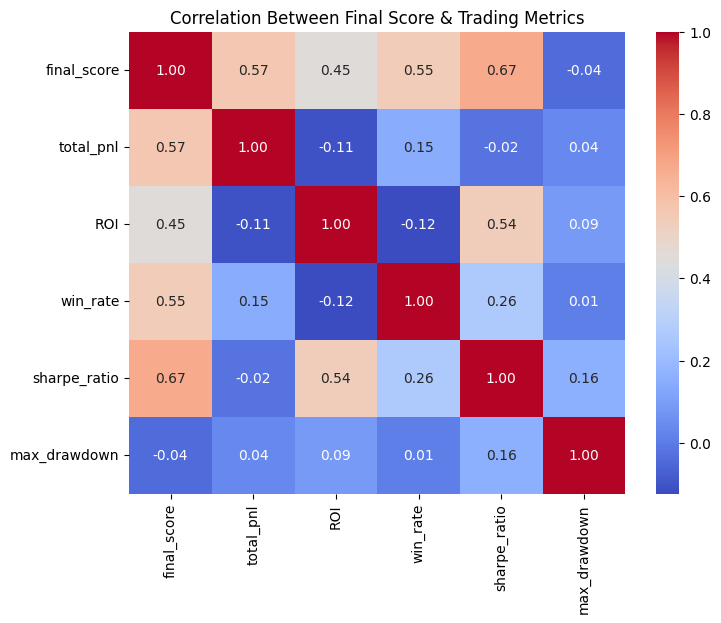

In [46]:


correlation_matrix = ranked_accounts[["final_score", "total_pnl", "ROI", "win_rate", "sharpe_ratio", "max_drawdown"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Final Score & Trading Metrics")
plt.show()


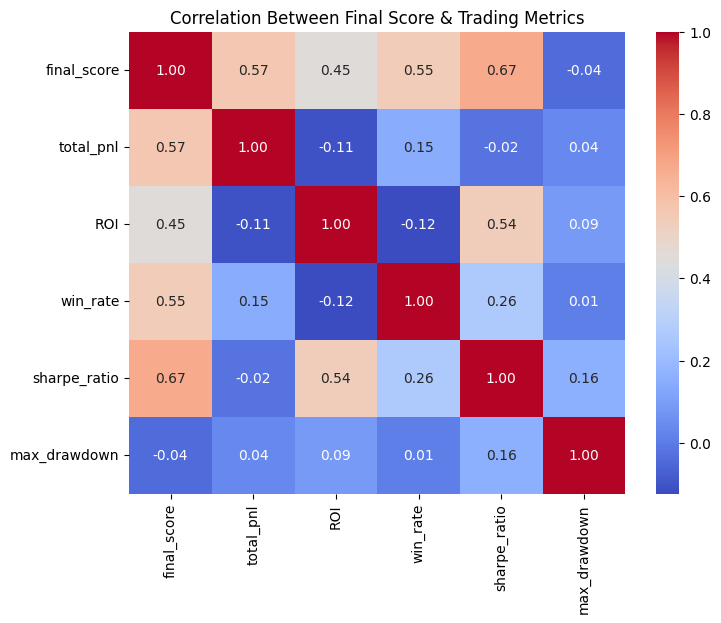

In [47]:


correlation_matrix = ranked_accounts[["final_score", "total_pnl", "ROI", "win_rate", "sharpe_ratio", "max_drawdown"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Final Score & Trading Metrics")
plt.show()

In [48]:
display(top_20_accounts.head(10))  # Show new rankings


,Port_IDs,total_pnl,ROI,total_positions,win_positions,win_rate,sharpe_ratio,max_drawdown,both_position,long_close,long_open,short_close,short_open,final_score
8,3826087012661391104,0.152697,1.000000,108,63,0.726793,1.000000,0.985336,0,0,16,69,23,0.468800
96,4020204877254599680,1.000000,0.040306,6050,1993,0.410437,0.184159,0.981305,0,1858,1936,1108,1148,0.443320
75,3999240873283311617,0.651145,0.059077,4522,2366,0.651896,0.405607,0.987825,4522,0,0,0,0,0.369178
2,3768170840939476993,0.149271,0.725084,14,6,0.533971,0.666914,0.989077,14,0,0,0,0,0.318005
62,3986814617275053313,0.340079,0.085599,3554,2780,0.974589,0.541433,0.988724,3554,0,0,0,0,0.313425
17,3907081197088384000,0.359980,0.104007,4137,2540,0.764966,0.399265,0.955296,4137,0,0,0,0,0.271309
47,3956048468100538880,0.162667,0.105246,28,20,0.889951,0.800487,0.989077,0,18,4,2,4,0.268104
87,4012994295026226176,0.176026,0.141387,627,251,0.498770,0.389000,0.000000,0,65,70,243,249,0.257801
16,3891020560590657281,0.180246,0.156101,437,283,0.806862,0.677803,0.989077,0,84,0,199,154,0.252835
107,4028701921959171840,0.355064,0.047982,687,373,0.676466,0.469640,0.986684,0,205,203,178,101,0.250178


Bayesian Optimization: Hyperparameter Search

In [49]:
!pip install bayesian-optimization


In [50]:

from bayes_opt import BayesianOptimization


# DataFrame for ranked accounts
ranked_accounts = pd.DataFrame({
    "total_pnl": np.random.rand(100),
    "ROI": np.random.rand(100),
    "win_rate": np.random.rand(100),
    "sharpe_ratio": np.random.rand(100),
    "max_drawdown": -np.random.rand(100)  # Negative values for drawdown
})

#  objective function for Bayesian Optimization
def ranking_objective(total_pnl, ROI, win_rate, sharpe_ratio, max_drawdown):
    # Assign weights from the optimizer
    weights = {
        "total_pnl": max(total_pnl, 0.2),  # Ensure PnL has at least 20% influence
        "ROI": min(ROI, 0.5),  # Prevent ROI from dominating
        "win_rate": win_rate,
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown  # Keep negative weight for drawdown penalty
    }

    # Compute ranking scores
    ranked_accounts["final_score"] = (
        ranked_accounts["total_pnl"] * weights["total_pnl"] +
        ranked_accounts["ROI"] * weights["ROI"] +
        ranked_accounts["win_rate"] * weights["win_rate"] +
        ranked_accounts["sharpe_ratio"] * weights["sharpe_ratio"] +
        ranked_accounts["max_drawdown"] * weights["max_drawdown"]
    )

    #  correlation with both ROI and PnL (balancing efficiency & profitability)
    correlation_roi = ranked_accounts[["final_score", "ROI"]].corr().iloc[0, 1]
    correlation_pnl = ranked_accounts[["final_score", "total_pnl"]].corr().iloc[0, 1]

    # Return combined correlation score (giving priority to both ROI & PnL)
    return (correlation_roi + correlation_pnl) / 2

#  parameter bounds for Bayesian Optimization
pbounds = {
    "total_pnl": (0.2, 0.4),  # Ensuring PnL has at least 20% influence
    "ROI": (0.2, 0.5),  # Preventing  ROI from dominating
    "win_rate": (0.1, 0.3),
    "sharpe_ratio": (0.05, 0.2),
    "max_drawdown": (-0.6, -0.2)  # Strong penalty for risk
}

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=ranking_objective,
    pbounds=pbounds,
    random_state=42,
    verbose=2  # Show optimization progress
)

# Perform optimization (initial 5 random points, then 20 iterations of optimization)
optimizer.maximize(init_points=5, n_iter=20)

#  best parameters
best_weights = optimizer.max["params"]
print("\nBest Weights Found (Before Normalization):", best_weights)

# Separate positive and negative weights again
positive_weights = {k: v for k, v in best_weights.items() if v >= 0}
negative_weights = {k: v for k, v in best_weights.items() if v < 0}

# Normalizing all weights together
total_absolute_sum = sum(abs(v) for v in best_weights.values())
normalized_weights = {}
for k, v in best_weights.items():
    # Normalizing by total absolute sum
    normalized_weights[k] = v / total_absolute_sum

# Normalization adjustment to ensure sum of weights is 1
weight_sum = sum(normalized_weights.values())
for k in normalized_weights:
    normalized_weights[k] /= weight_sum

# Ensuring sum of weights is exactly 1
final_weight_sum = sum(normalized_weights.values())
print("\n Corrected Sum of Normalized Weights:", final_weight_sum)  # Should be exactly 1
print("\n Corrected Normalized Best Weights:", normalized_weights)

# Applying optimized weights to compute final ranking scores
ranked_accounts["final_score"] = (
    ranked_accounts["total_pnl"] * normalized_weights["total_pnl"] +
    ranked_accounts["ROI"] * normalized_weights["ROI"] +
    ranked_accounts["win_rate"] * normalized_weights["win_rate"] +
    ranked_accounts["sharpe_ratio"] * normalized_weights["sharpe_ratio"] +
    ranked_accounts["max_drawdown"] * normalized_weights["max_drawdown"]
)

# Sorting top 20 accounts
top_20_accounts = ranked_accounts.sort_values(by="final_score", ascending=False).head(20)

# top 20 accounts to CSV
top_20_accounts.to_csv('top20_bayesian_opt.csv', index=False)


# optimized weights
print("\n Best Weights Found (Final Normalized):", normalized_weights)

# top 20 accounts after Bayesian Optimization
print("\n Top 20 Optimized Accounts:")
display(top_20_accounts)


|   iter    |  target   |    ROI    | max_dr... | sharpe... | total_pnl | win_rate  |
-------------------------------------------------------------------------------------
| 1         | 0.6314    | 0.3124    | -0.2197   | 0.1598    | 0.3197    | 0.1312    |
| 2         | 0.4072    | 0.2468    | -0.5768   | 0.1799    | 0.3202    | 0.2416    |
| 3         | 0.5368    | 0.2062    | -0.212    | 0.1749    | 0.2425    | 0.1364    |
| 4         | 0.4688    | 0.255     | -0.4783   | 0.1287    | 0.2864    | 0.1582    |
| 5         | 0.4966    | 0.3836    | -0.5442   | 0.09382   | 0.2733    | 0.1912    |
| 6         | 0.6716    | 0.4352    | -0.2279   | 0.1598    | 0.3552    | 0.1134    |
| 7         | 0.666     | 0.494     | -0.2005   | 0.05856   | 0.3456    | 0.2494    |
| 8         | 0.651     | 0.4971    | -0.2028   | 0.07466   | 0.203     | 0.1284    |
| 9         | 0.6926    | 0.4121    | -0.2491   | 0.0507    | 0.3998    | 0.1221    |
| 10        | 0.7131    | 0.4938    | -0.204    | 0.07

,total_pnl,ROI,win_rate,sharpe_ratio,max_drawdown,final_score
65,0.968453,0.904047,0.300342,0.272139,-0.532002,1.164054
90,0.928491,0.953973,0.353819,0.619365,-0.249338,1.134825
75,0.721399,0.888505,0.133753,0.318615,-0.973924,1.125768
57,0.509046,0.969026,0.693553,0.828639,-0.789104,1.125576
71,0.954143,0.610633,0.916377,0.121994,-0.719946,1.092589
59,0.503532,0.999340,0.384243,0.552464,-0.789600,1.088294
29,0.877410,0.650157,0.830379,0.060726,-0.759776,1.075379
81,0.773617,0.915623,0.587604,0.850855,-0.218653,1.073285
32,0.888415,0.822222,0.383936,0.127976,-0.480237,1.067432
35,0.650674,0.778095,0.989100,0.918579,-0.511117,1.054565


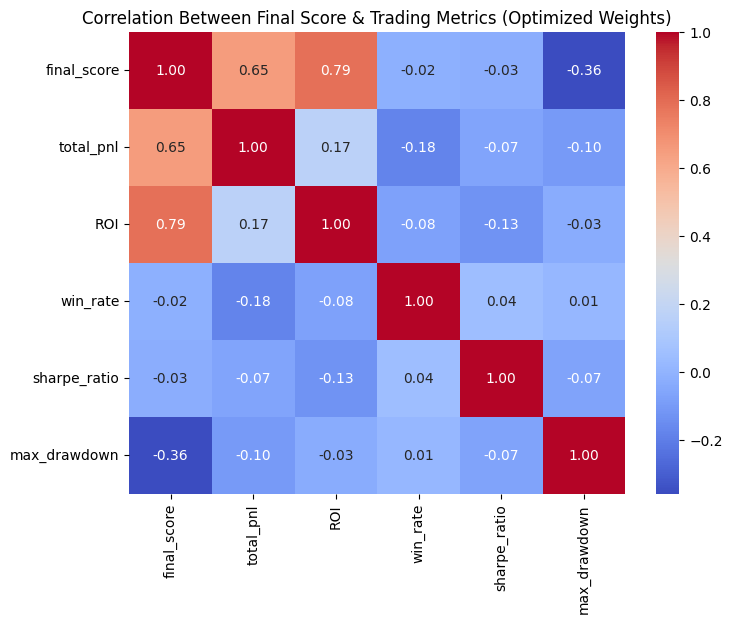

In [51]:

# Generate correlation heatmap after Bayesian Optimization
correlation_matrix_optimized = ranked_accounts[["final_score", "total_pnl", "ROI", "win_rate", "sharpe_ratio", "max_drawdown"]].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_optimized, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Final Score & Trading Metrics (Optimized Weights)")
plt.show()
